## State Weather Data Processing

#### The Data: 
The weather data was obtained from NOAA, the National Oceanic and Atmospheric Administration. Which maintains monthly data of recorded temperatures by "Division" (subsets of states) [here](https://www.ncdc.noaa.gov/cag/divisional/mapping/110/tavg/202010/ytd/value). Data for all years/months (dating back to 1895) were downloaded into a csv to be processed. 

The features of interest for our analysis are:
* `Location` a description of the division, which includes the state containing the division
* `Date` the date of the observation, stored as YYYYMM
* `Value` the temperature recorded in degrees Fahrenheit

#### The Significance: 
Since COVID has been shown to spread more indoors than outdoors, during extreme temperatures people are more likely to gather inside which may contribute to an increase in transmission. The temperature data, while is does not include other weather factors such as rain or snow, may improve modeling by capturing these indoor gathering tendencies. 

In [144]:
import pandas as pd

In [145]:
# data downloaded from https://www.ncdc.noaa.gov/cag/divisional/mapping/110/tavg/202010/ytd/value
weather_data = pd.read_csv('../data/noaa_weather_data.csv')

In [146]:
weather_data.head()

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,101,Alabama CD 1. Northern Valley,189501,37.7,36,-2.4,40.1
1,101,Alabama CD 1. Northern Valley,189502,32.8,3,-10.3,43.1
2,101,Alabama CD 1. Northern Valley,189503,50.3,53,-0.6,50.9
3,101,Alabama CD 1. Northern Valley,189504,61.2,88,1.4,59.8
4,101,Alabama CD 1. Northern Valley,189505,66.8,42,-1.2,68.0


In [147]:
weather_data.shape

(523568, 7)

Dates are currently stored as a single integer for the month and year, represented by YYYMM. The following cells extract the month and year sepearately.

The location granularity has multiple locations per state, but since our analysis will take place on the state level, we'll want to aggregate state-wide. The cell below extracts the State name from the `Location` field, which is the first word in the string. 

In [148]:
weather_data.loc[:,'Month'] = weather_data['Date'].astype(int).astype(str).str[4:6].astype(int)
weather_data.loc[:,'Year']  = weather_data['Date'].astype(int).astype(str).str[0:4].astype(int)
weather_data['State'] = weather_data['Location'].str.split(' CD', n=1, expand=True).loc[:,0]

In [149]:
weather_data.head()

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean,Month,Year,State
0,101,Alabama CD 1. Northern Valley,189501,37.7,36,-2.4,40.1,1,1895,Alabama
1,101,Alabama CD 1. Northern Valley,189502,32.8,3,-10.3,43.1,2,1895,Alabama
2,101,Alabama CD 1. Northern Valley,189503,50.3,53,-0.6,50.9,3,1895,Alabama
3,101,Alabama CD 1. Northern Valley,189504,61.2,88,1.4,59.8,4,1895,Alabama
4,101,Alabama CD 1. Northern Valley,189505,66.8,42,-1.2,68.0,5,1895,Alabama


In [150]:
print(weather_data['State'].unique())
print(weather_data['State'].nunique())

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Florida' 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
48


In [151]:
contiguous_US = ['Michigan','Wyoming','Maryland','Massachusetts','Rhode Island','Oregon',
                 'Pennsylvania','West Virginia','District of Columbia','Maine','Indiana',
                 'Nevada','Georgia','New Mexico','Colorado','Virginia','Kentucky','Minnesota',
                 'Arkansas','Connecticut','North Carolina','Montana','Oklahoma','Louisiana',
                 'Nebraska','Alabama','Florida','North Dakota','Delaware','Vermont','Idaho',
                 'Kansas','Wisconsin','New Jersey','Iowa','Missouri','New York','Utah',
                 'Washington','Arizona','Tennessee','Ohio','Texas','Mississippi','South Carolina',
                 'California','New Hampshire','South Dakota','Illinois']
print("Missing Regions from this dataset:")
set(contiguous_US) - set(weather_data['State'].unique())

Missing Regions from this dataset:


{'District of Columbia'}

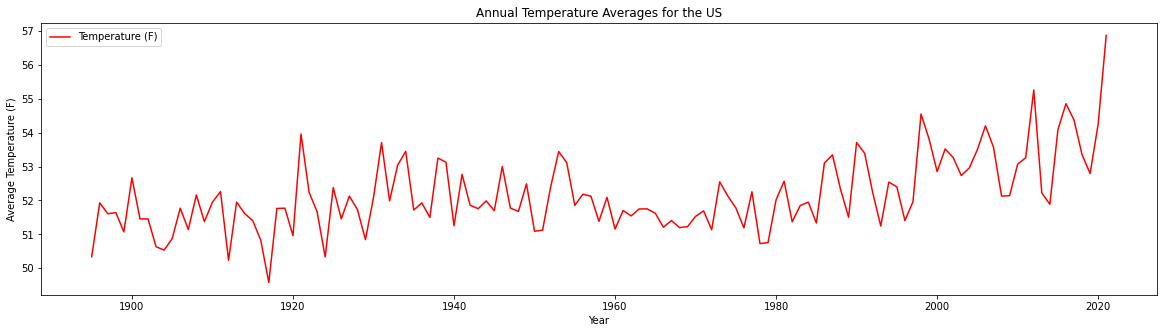

In [203]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)
weather_data['Date'] = pd.to_datetime(weather_data['Year'].astype(str) + weather_data['Month'].astype(str), format='%Y%m')
weather_temps_over_time = weather_data.groupby(['Year']).agg(np.mean)[['Value']].rename(columns={"Value":"Temperature (F)"})
weather_temps_over_time.plot(color='red')#
plt.title("Annual Temperature Averages for the US");
plt.ylabel("Average Temperature (F)");
plt.savefig(fname="../figures/global_warming.png")

Since global warming has caused measurable changes in temperatures over time, let's take the last 20 years as "recent data" from which we can compute averages and extract data of interest. 

In [135]:
recent_weather = weather_data[weather_data['Year']>=2020]
list(recent_weather.groupby(['Year','Month']).count().index)

[(2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8),
 (2020, 9),
 (2020, 10),
 (2020, 11),
 (2020, 12),
 (2021, 1),
 (2021, 2),
 (2021, 3),
 (2021, 4),
 (2021, 5),
 (2021, 6),
 (2021, 7),
 (2021, 8),
 (2021, 9),
 (2021, 10)]

In [136]:
#sanity check temperature values (in F)
recent_weather[recent_weather['Location'].str.contains('California')].head(12)[['State','Year','Month','Value']]

,State,Year,Month,Value
38028,California,2020,1,41.6
38029,California,2020,2,45.2
38030,California,2020,3,43.9
38031,California,2020,4,52.1
38032,California,2020,5,56.4
38033,California,2020,6,62.8
38034,California,2020,7,69.0
38035,California,2020,8,71.4
38036,California,2020,9,67.5
38037,California,2020,10,60.6


The monthly temperatures for California in 2020 seem reasonable, with averages in the 40's during the winter months and up to the 60's and 70's during the warmer months. 

### Extracting Features

From this data we can compute the following features:
* The recent monthly average temperatures for each state 
* The monthly temperatures for each state during the time span of our analysis (2020-2021)

Some additional variables we could look at (here or later in the analysis): 
* The difference in temperatures from "room temperature" 
* The absolute difference in temperatures from "room temperature" 
* The (absolute) difference in temperature from the historical average 
* Separate measures of hot/cold by calculating degrees above/below average or room temperature 

Now we compute the average temperature in each state by month for data collected between 2000 and 2019. This gives a fairly good estimate of average monthly temps, exlcuding the months we may include in our modeling. We can use to compare the current temps to recent historical averages. We also compute for each state and month in the 2020-2021 range the average temp recorded which can be incorporated into our modeling. 

In [137]:
monthly_avgs_by_state = weather_data[(weather_data['Year'] >= 2000) & (weather_data['Year'] < 2020) ].groupby(['State','Month']).mean()['Value'].reset_index()
monthly_avgs_by_state.head()

,State,Month,Value
0,Alabama,1,44.468750
1,Alabama,2,48.623750
2,Alabama,3,55.858750
3,Alabama,4,63.096875
4,Alabama,5,71.006875


In [138]:
recent_monthly_avgs = recent_weather.groupby(['State','Year','Month']).mean()['Value'].reset_index()
recent_monthly_avgs.head()

,State,Year,Month,Value
0,Alabama,2020,1,49.2250
1,Alabama,2020,2,50.4875
2,Alabama,2020,3,62.8875
3,Alabama,2020,4,61.5500
4,Alabama,2020,5,68.5625


In [139]:
#sanity check again
recent_monthly_avgs[recent_monthly_avgs['State']=='California']

,State,Year,Month,Value
66,California,2020,1,44.400000
67,California,2020,2,47.842857
68,California,2020,3,46.457143
69,California,2020,4,54.628571
70,California,2020,5,61.928571
71,California,2020,6,67.485714
72,California,2020,7,73.385714
73,California,2020,8,75.914286
74,California,2020,9,71.500000
75,California,2020,10,64.300000


Once again these average temperatures for the months in CA over the last 2 years seem reasonable (in F). 

### Save Processed Data

Now we save this cleaned and processed data to csv files to be used in our future modeling and analysis. 

In [140]:
monthly_avgs_by_state = monthly_avgs_by_state.rename(columns={'Value':'Monthly Avg Temp (F)'})
monthly_avgs_by_state.head()

,State,Month,Monthly Avg Temp (F)
0,Alabama,1,44.468750
1,Alabama,2,48.623750
2,Alabama,3,55.858750
3,Alabama,4,63.096875
4,Alabama,5,71.006875


In [141]:
recent_monthly_avgs = recent_monthly_avgs.rename(columns={'Value':'Monthly Temp (F)'})
recent_monthly_avgs.head()

,State,Year,Month,Monthly Temp (F)
0,Alabama,2020,1,49.2250
1,Alabama,2020,2,50.4875
2,Alabama,2020,3,62.8875
3,Alabama,2020,4,61.5500
4,Alabama,2020,5,68.5625


In [142]:
all_weather = recent_monthly_avgs.merge(monthly_avgs_by_state, on=['State','Month'])

In [143]:
all_weather.to_csv('../data/all_weather_data.csv')
monthly_avgs_by_state.to_csv('../data/historical_monthly_temp_avgs_by_state.csv')
recent_monthly_avgs.to_csv('../data/monthly_temps_by_state.csv')